In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

plt.ioff()  

In [2]:
Vevey = pd.read_csv('Vevey_21_22.csv', sep=";")
Vevey['Time Stamp'] = pd.to_datetime(Vevey['Time Stamp'], format='%d.%m.%Y %H:%M')
Vevey['Time'] = Vevey['Time Stamp'].dt.strftime('%H:%M')

/var/folders/2n/hcnm2b7x4ms7q2k734nx80p80000gn/T/ipykernel_4118/3386704996.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_Vevey = Vevey.groupby(['Time']).mean()
/var/folders/2n/hcnm2b7x4ms7q2k734nx80p80000gn/T/ipykernel_4118/3386704996.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp_Winter = Winter.groupby(['Time']).mean()


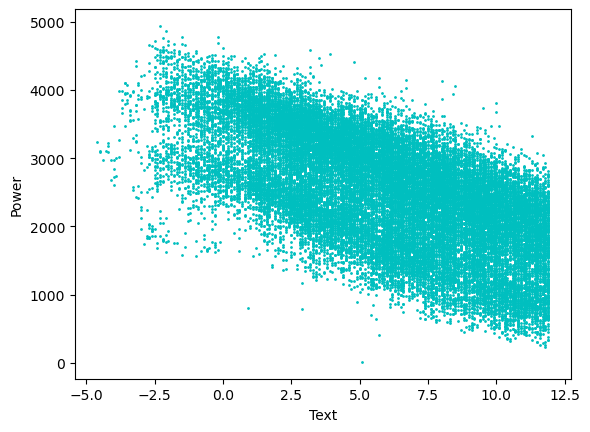

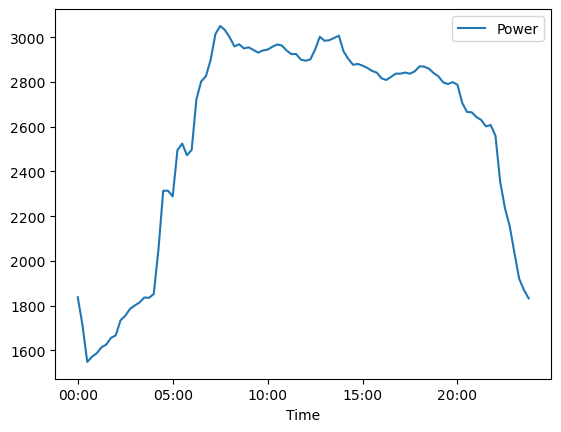

In [3]:
# scatter_matrix(Vevey, alpha=0.2, figsize=(8, 8), diagonal='hist')
# plt.show()

Winter = Vevey.loc[(Vevey['Text'] < 12)]

# Réindexer le DataFrame résultant
Winter = Winter.reset_index(drop=True)

grp_Vevey = Vevey.groupby(['Time']).mean()
grp_Winter = Winter.groupby(['Time']).mean()

#Vevey.plot(x='Text',y='Power',kind="scatter",c='c',s=1)
Winter.plot(x='Text',y='Power',kind="scatter",c='c',s=1)
grp_Winter.plot(y='Power')
plt.show()

#pd.plotting.scatter_matrix(Vevey, alpha=0.2, figsize=(16, 16), diagonal='hist')
#pd.plotting.scatter_matrix(Winter, alpha=0.2, figsize=(16, 16), diagonal='hist')

                            OLS Regression Results                            
Dep. Variable:                  Power   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     4868.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:00:12   Log-Likelihood:            -1.7940e+05
No. Observations:               24726   AIC:                         3.589e+05
Df Residuals:                   24701   BIC:                         3.591e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2586.4502     10.403    248.622      0.0

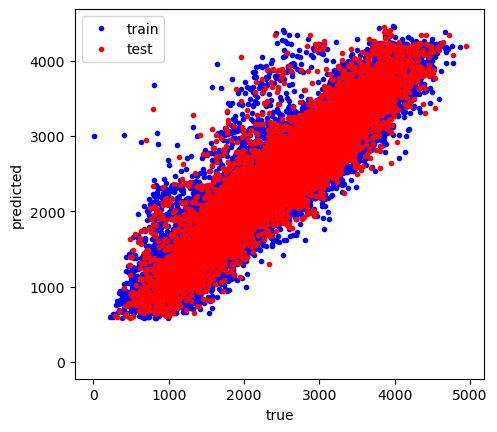

In [4]:
Winter['Time'] = Winter['Time Stamp'].dt.strftime('%H')

X = Winter.drop('TdepCAD',axis=1)
X = X.drop('TretCAD',axis=1)
X = X.drop('Time Stamp',axis=1)

time=pd.get_dummies(X['Time'],drop_first=True)

X = X.drop('Time',axis=1)

X=pd.concat([X,time],axis=1)
X.head()

y = X.iloc[:,1]
X = X.drop('Power',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#add constant to predictor variables
X_train = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_train).fit()

#view model summary
print(model.summary())

#evaluate MSE, MAD, and R2 on train and test datasets
#prediction in sample:
y_p_train = model.predict(X_train)

# Predicting the Test set results
X_test = sm.add_constant(X_test)
y_p_test = model.predict(X_test)

# mse
print('train mse =', np.std(y_train - y_p_train))
print('test mse =', np.std(y_test - y_p_test))
# mse
print('train mae =', np.mean(np.abs(y_train - y_p_train)))
print('test mae =', np.mean(np.abs(y_test - y_p_test)))

# plot y vs predicted y for test and train parts
plt.plot(y_train, y_p_train, 'b.', label='train')
plt.plot(y_test, y_p_test, 'r.', label='test')

plt.plot([0], [0], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

In [5]:
from mpl_toolkits.mplot3d import Axes3D

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


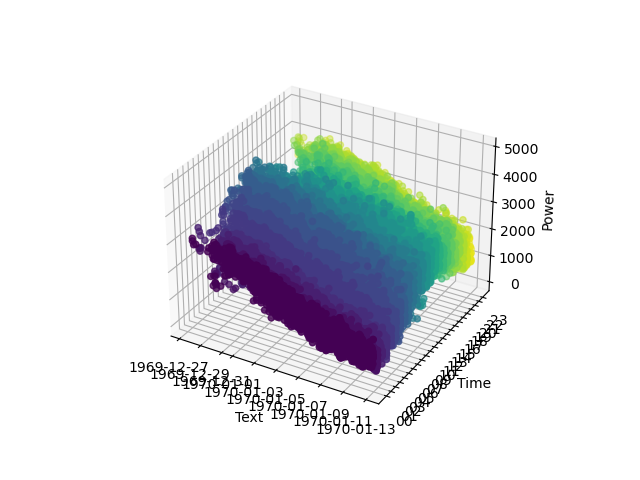

In [7]:
# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Choose a colormap
cmap = plt.get_cmap("viridis")

# Map unique 'Time' values to a range between 0 and 1
unique_times = Winter['Time'].unique()
time_to_color = {time: cmap(i / len(unique_times)) for i, time in enumerate(unique_times)}

# Assign a color to each data point based on 'Time'
colors = [time_to_color[time] for time in Winter['Time']]

# Replace 'Winter' with your actual DataFrame name
scatter = ax.scatter(Winter['Text'], Winter['Time'], Winter['Power'], c=colors)

ax.set_xlabel('Text')
ax.set_ylabel('Time')
ax.set_zlabel('Power')

plt.show()

In [7]:
X_temp = X.head(1000)
X_temp = sm.add_constant(X_temp)

In [8]:
y_temp = model.predict(X_temp)

<IPython.core.display.Javascript object>


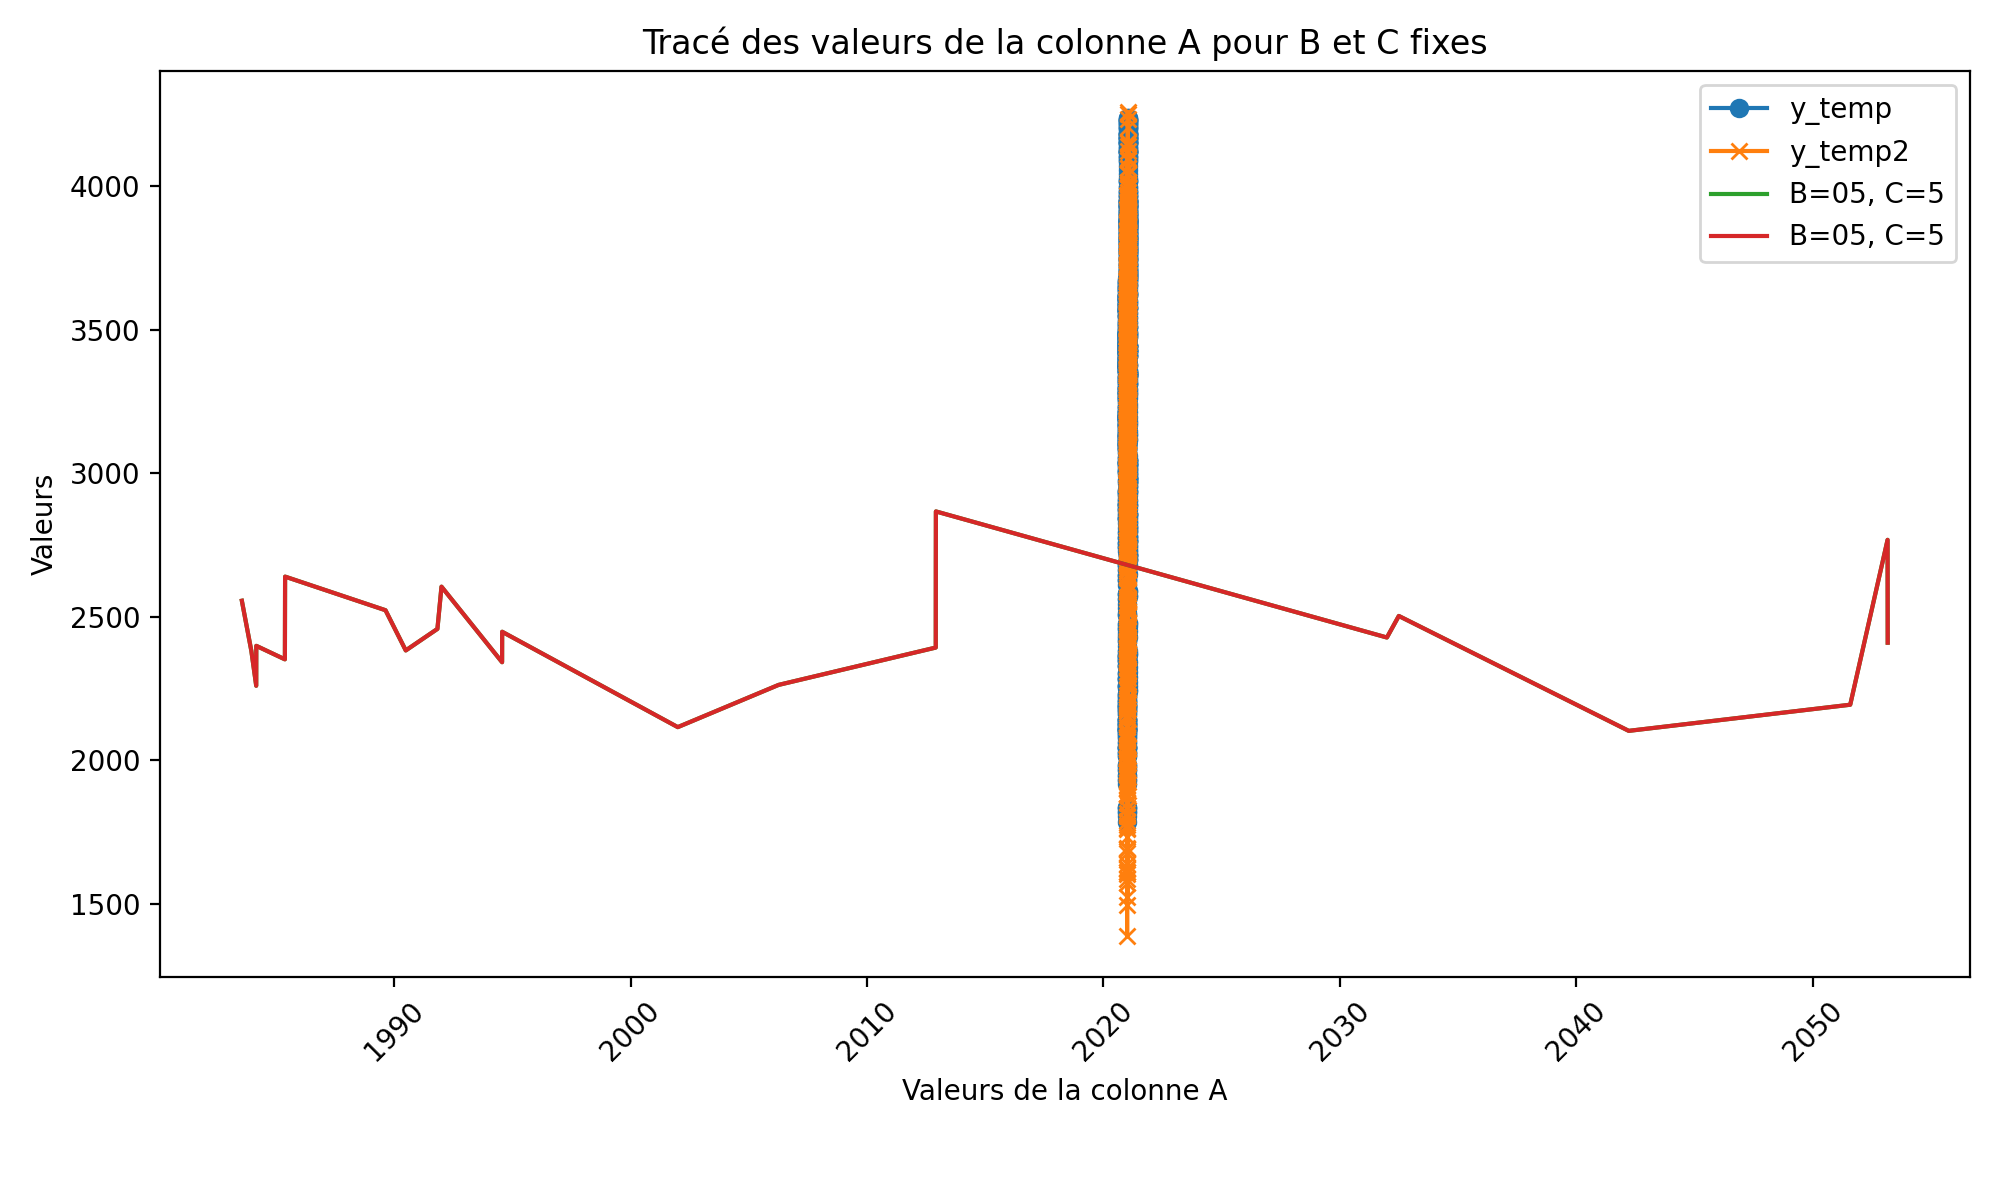

In [10]:
# Create the graph
plt.figure(figsize=(10, 6))  # Set the size of the graph

# Plot the first line
plt.plot(Winter["Time Stamp"][:1000], y_temp, marker='o', linestyle='-', label='y_temp')

# Plot the second line
plt.plot(Winter["Time Stamp"][:1000], Winter["Power"][:1000], marker='x', linestyle='-', label='y_temp2')

# Add labels and a title
plt.xlabel('Time Stamp')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

# Format the dates on the x-axis if needed
plt.xticks(rotation=45)

# Show a legend
plt.legend()

# Display the graph
plt.tight_layout()  # Adjust margins to make everything visible
plt.show()

In [11]:
Winter.head()

,Time Stamp,TdepCAD,TretCAD,Text,Power,Time
0,2021-01-01 00:15:00,87.2,71.0,4.7,1611.0,00
1,2021-01-01 00:30:00,86.8,69.9,4.6,1388.0,00
2,2021-01-01 00:45:00,86.9,68.8,4.8,1572.0,00
3,2021-01-01 01:00:00,86.9,66.8,4.5,1879.0,01
4,2021-01-01 01:15:00,87.4,68.7,4.2,1624.0,01


In [12]:
Winter['T_round'] = Winter['Text'].apply(lambda x: round(x * 2) / 2)

<IPython.core.display.Javascript object>


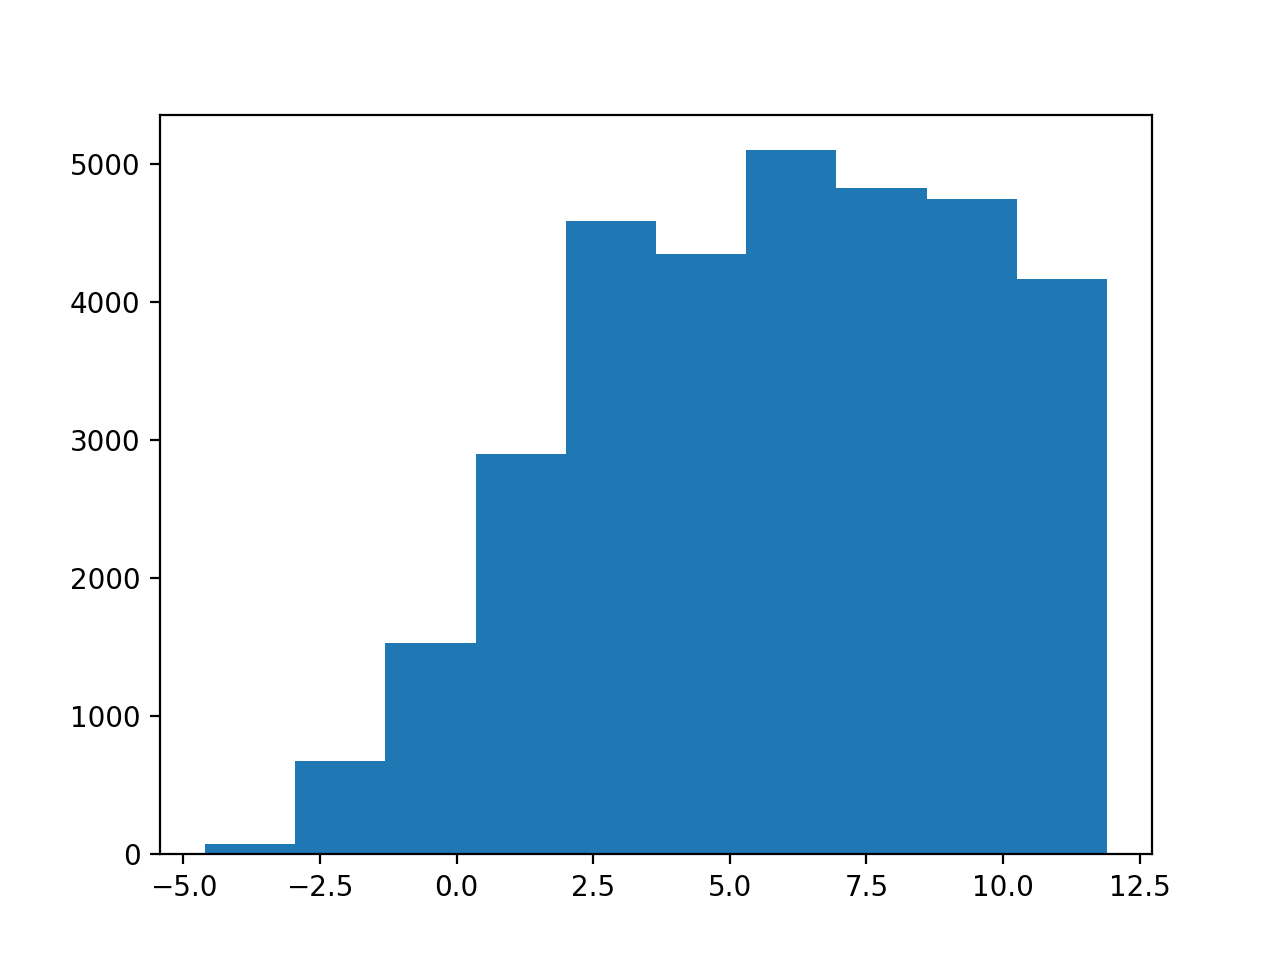

In [46]:
plt.hist(Winter['Text'])
plt.show()

In [69]:
# Valeurs fixes de B et C pour le tracé
fixed_hour = '06'
fixed_Text = 6


# Filtrer les lignes du DataFrame avec les valeurs fixes de B et C
filtered_df = Winter[(Winter['Time'] == fixed_hour) & (Winter['T_round'] == fixed_Text)]

<IPython.core.display.Javascript object>


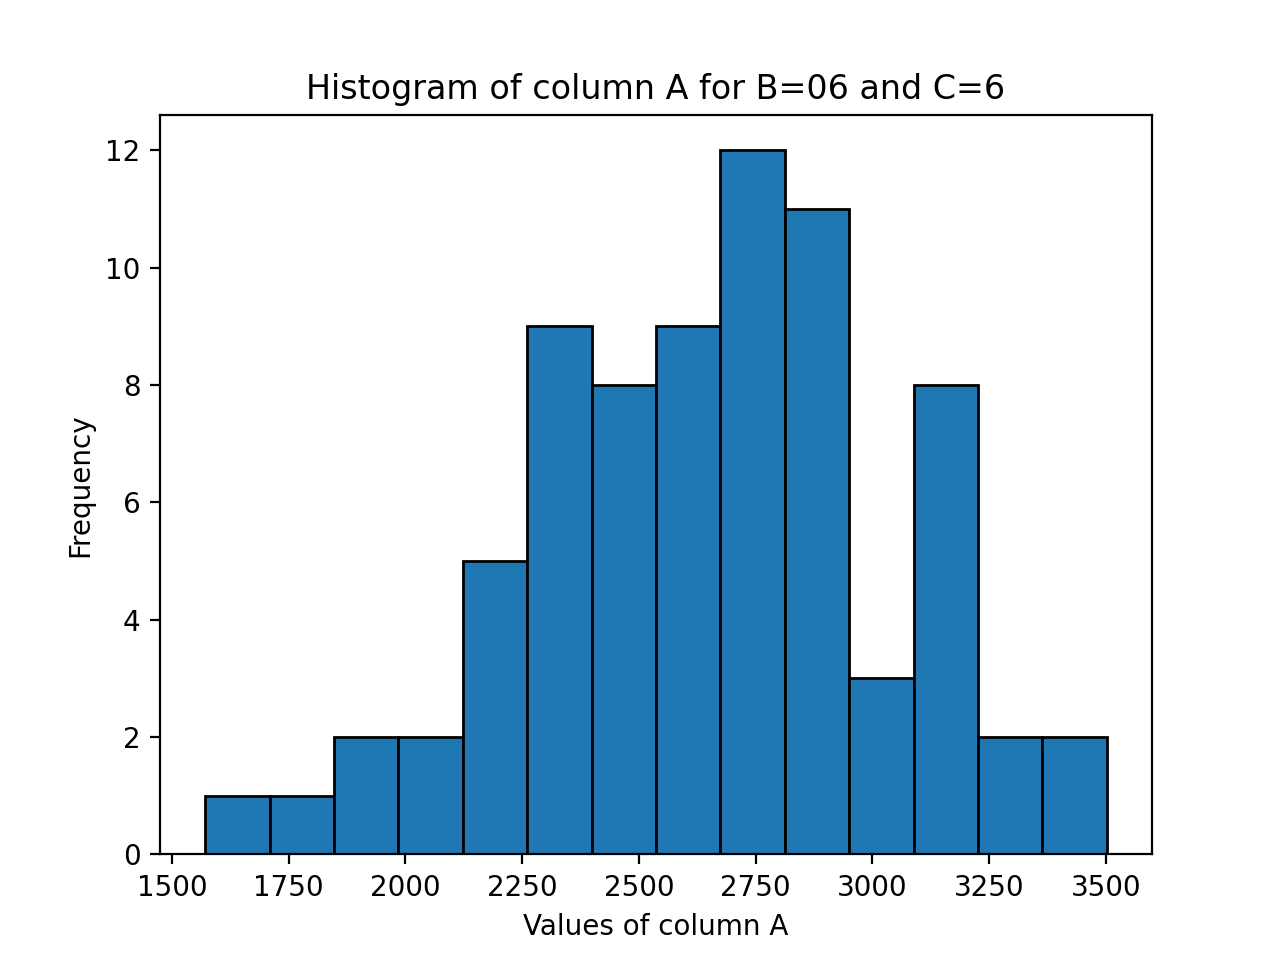

In [73]:
# Create the graph
plt.hist(filtered_df['Power'], bins=14, edgecolor='black')
plt.xlabel('Values of column A')
plt.ylabel('Frequency')
plt.title(f'Histogram of column A for B={fixed_hour} and C={fixed_Text}')
plt.show()